In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import optimize

np.set_printoptions(suppress=True)

In [10]:
data = pd.read_csv("credit_score.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79805 entries, 0 to 79804
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                79805 non-null  int64  
 1   Month                     79805 non-null  int64  
 2   Age                       79805 non-null  float64
 3   Occupation                79805 non-null  int64  
 4   Annual_Income             79805 non-null  float64
 5   Monthly_Inhand_Salary     79805 non-null  float64
 6   Num_Bank_Accounts         79805 non-null  float64
 7   Num_Credit_Card           79805 non-null  float64
 8   Interest_Rate             79805 non-null  float64
 9   Num_of_Loan               79805 non-null  float64
 10  Type_of_Loan              79805 non-null  int64  
 11  Delay_from_due_date       79805 non-null  int64  
 12  Num_of_Delayed_Payment    79805 non-null  float64
 13  Changed_Credit_Limit      79805 non-null  int64  
 14  Num_Cr

In [11]:
#Selección de las columnas para x y y
x = data.iloc[:, 1:23]
y = data.iloc[:, 24]

num_labels = 3

x = x.to_numpy()
y = y.to_numpy()

print(x)
print(y)

[[  2.          23.          13.         ...  49.57494921 118.28022162
    3.        ]
 [  6.          34.42981709  13.         ...  49.57494921  81.69952126
    4.        ]
 [  0.          23.          13.         ...  49.57494921 199.45807439
    5.        ]
 ...
 [  5.          25.           9.         ...  35.10402261  24.02847745
    0.        ]
 [  4.          25.           9.         ...  35.10402261 251.6725822
    3.        ]
 [  1.          25.           9.         ...  35.10402261 167.16386516
    6.        ]]
[2 2 2 ... 0 1 0]


In [12]:
#Normalización de los datos
def featureNormalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_norm = (x - mu) / sigma
    return x_norm, mu, sigma

x, mu, sigma = featureNormalize(x)
print(x)

[[-0.65615131 -1.18048387  1.19736525 ... -0.16276833 -0.26062156
   0.00024762]
 [ 1.09121351  0.00035981  1.19736525 ... -0.16276833 -0.27891156
   0.50694669]
 [-1.52983372 -1.18048387  1.19736525 ... -0.16276833 -0.22003339
   1.01364576]
 ...
 [ 0.65437231 -0.97385875  0.328422   ... -0.16451475 -0.30774655
  -1.51984959]
 [ 0.2175311  -0.97385875  0.328422   ... -0.16451475 -0.19392662
   0.00024762]
 [-1.09299252 -0.97385875  0.328422   ... -0.16451475 -0.23618019
   1.52034483]]


In [13]:
#Generar set de entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((63844, 22), (15961, 22))

In [14]:
#Función de activación sigmoid
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [15]:
#Función de costo y descenso por el gradiente
def lrCostFunction(theta, x, y, lambda_):
    m = y.size
    h = sigmoid(x.dot(theta.T))
    theta = theta.copy()
    theta[0] = 0
    j = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta))
    grad = (1 / m) * (h - y).dot(x) 
    grad = grad + (lambda_ / m) * theta
    return j, grad

In [16]:
#Función para el cálculo de los valores de theta
def oneVsAll(x, y, num_labels, lambda_):
    m, n = x.shape
    all_theta = np.zeros((num_labels, n + 1))
    x = np.concatenate([np.ones((m, 1)), x], axis=1)
    all_j_history = []
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        j_history = []
        def costFunction(theta, x, y, lambda_):
            j, grad = lrCostFunction(theta, x, y, lambda_)
            j_history.append(j)
            return j, grad
        options = {'maxiter': 1000}
        res = optimize.minimize(costFunction,
                                initial_theta,
                                (x, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        all_theta[c] = res.x
        all_j_history.append(j_history)
    return all_theta, all_j_history

In [17]:
lambda_ = 0.01
all_theta, all_j_history = oneVsAll(x_train, y_train, num_labels, lambda_)
print(all_theta)

[[-1.08105755  0.00607009 -0.0559206   0.00649018 -0.01273339 -0.02537753
  -0.02362097  0.15960987  0.56346513  0.01441222 -0.02889865  0.30776311
  -0.00398148  0.0301803  -0.01219846 -0.22701896  0.00782225  0.01961269
  -0.10391849  0.02549173  0.001258    0.00434316  0.13530614]
 [ 0.14065395  0.00862669  0.00480766  0.00058814  0.01623068 -0.00450886
   0.16755866  0.02305041 -0.21308982  0.06895151  0.02270934  0.00030416
   0.01021628 -0.03076294  0.00971033  0.72903404  0.12084536 -0.00407712
  -0.00096642  0.11099843 -0.00106518 -0.01003317 -0.05035204]
 [-2.37558694 -0.02806831  0.04763731 -0.01846403 -0.01002092  0.0138729
  -0.04745577 -0.64782346 -0.61123313 -0.14414788 -0.00865138 -0.64354131
  -0.00822638  0.02114123 -0.00517222 -0.95797858 -0.40948264 -0.03458521
   0.11656876 -0.2170326  -0.00196262  0.01421922 -0.10038969]]


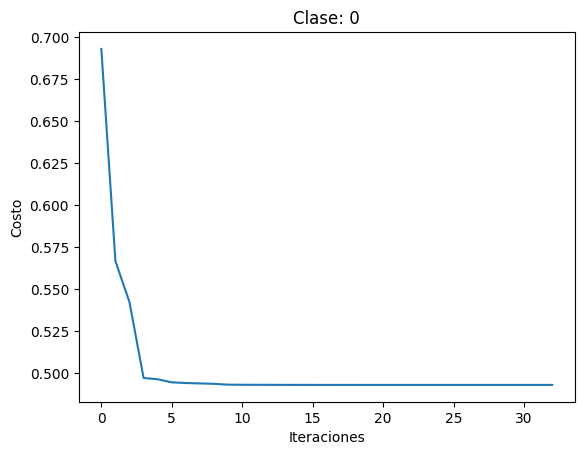

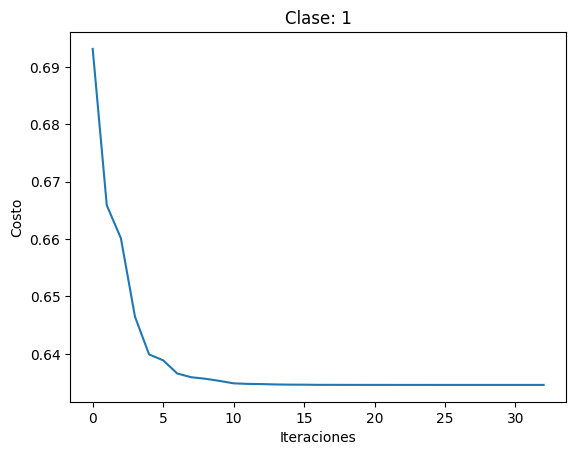

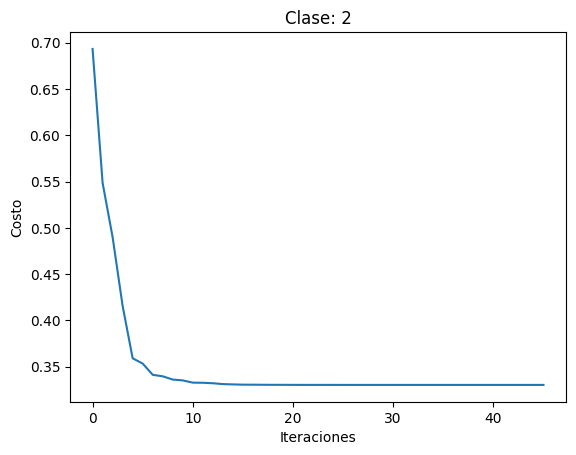

In [18]:
#Gráficas de coste de los valores de theta para las distintas clases
for i, j_history in enumerate(all_j_history):
    plt.plot(j_history)
    plt.title(f'Clase: {i}')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.show()

In [19]:
#Función para ejecutar el modelo generado
def predictOneVsAll(all_theta, x):
    m = x.shape[0];
    x = np.concatenate([np.ones((m, 1)), x], axis = 1)
    p = np.argmax(sigmoid(x.dot(all_theta.T)), axis = 1)
    return p

In [20]:
#Ejemplo de las predicciones realizadas por el modelo
p = predictOneVsAll(all_theta, x_test)
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(p == y_test) * 100))
x_test_1 = x_test[0:10, :].copy()
p = predictOneVsAll(all_theta, x_test_1)
print("Predicciones:")
print(p)
print("Valores reales:")
print(y_test[0:10])

Precision del conjunto de entrenamiento: 61.85%
Predicciones:
[1 1 0 1 0 1 1 1 1 1]
Valores reales:
[1 1 0 2 0 1 2 1 1 2]
